# Impletementing Ridge and Lasso Regression

1. Importing Libraries Necessary for the project.
2. Defining graph function to be lter used to visualize Data
3. Understanding Data, it's Coloumns and type.
4. Cleaning Data for use and Data preprocessing, by converting object type to int.
5. Diving Data into Training and Target Data Sets.
6. Visualizing Training Data Set using Histograms, Heatmaps and displots.
7. Removing neglectable Features that we know after Visualization.
8. Visualizing Again to be sure that the data is now ready to be used.
9. Splitting Training and Testing Data From Training Data.
10. Training our model using Ridge Regression and then calculating it's accuracy.
11. Visualizing our Coeffecients and effect of alpha on coefficients.
12. Applying trianed model on Testing Data and predicting target variable.
13. Training another model using Lasso Regression and calculating it's accuracy.
14. Visualizing our Coefficients and effect of alpha on Coefficients.
15. Applying trained model on Testing Data and predicting target variable.
16. Comparing and visualizing outputs from Ridge and Lasso Regression.
17. And lastly, we plot the difference between lasso and ridge regression.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Defining Functions

1. Function for Heatmap

In [2]:
def Heat(Datax):
    corelate = Datax.corr()
    fig, ax = plt.subplots(figsize = (20,10))
    ax = sns.heatmap(corelate, annot = True)
    plt.show()

2. Function for distplots

In [3]:
def dis(Dcol):
    for i in Dcol.columns:
        fig, ax = plt.subplots(figsize = (6, 3))
        xlabel = 'a'
        ax = sns.distplot(Dcol.loc[:,i])
        plt.show()

3. Function For Bar Graphs

In [4]:
def Bar(x,y):
    fig, ax = plt.subplots(figsize=(18,10))
    ax = plt.bar(x, y)
    plt.style.use('ggplot') 
    plt.show()

Reading Data 

In [5]:
Data = pd.read_excel('Hitters.xlsx')

Type of Data for each column

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


Converting type object into int64 for use.

In [7]:
for i in range(len(Data)):
    if(Data.loc[i,'League'] == 'A'):
        Data.loc[i,'League'] = 50
    else:
        Data.loc[i,'League'] = 60
    
    if(Data.loc[i,'NewLeague'] == 'A'):
        Data.loc[i,'NewLeague'] = 50 
    else:
        Data.loc[i,'NewLeague'] = 60
    
    if(Data.loc[i,'Division'] == 'E'):
        Data.loc[i,'Division'] = 50
    else:
        Data.loc[i,'Division'] = 60

# Extracting Training Data From Data Set

In [8]:
Data_train = pd.DataFrame(Data)

In [9]:
for i in range(0,len(Data_train)):
    if(str(Data_train.loc[i,'Salary']) == 'nan'):
        Data_train.drop([i],axis = 0, inplace = True)

# Extracting Target Data From Data Set

In [10]:
Data_target = pd.DataFrame(Data)

In [11]:
for i in range(0,len(Data_target)):
    if(str(Data_target.loc[i,'Salary']) != 'nan'):
        Data_target.drop([i], inplace = True)

# Visualizing Data with Histogram for each Columns

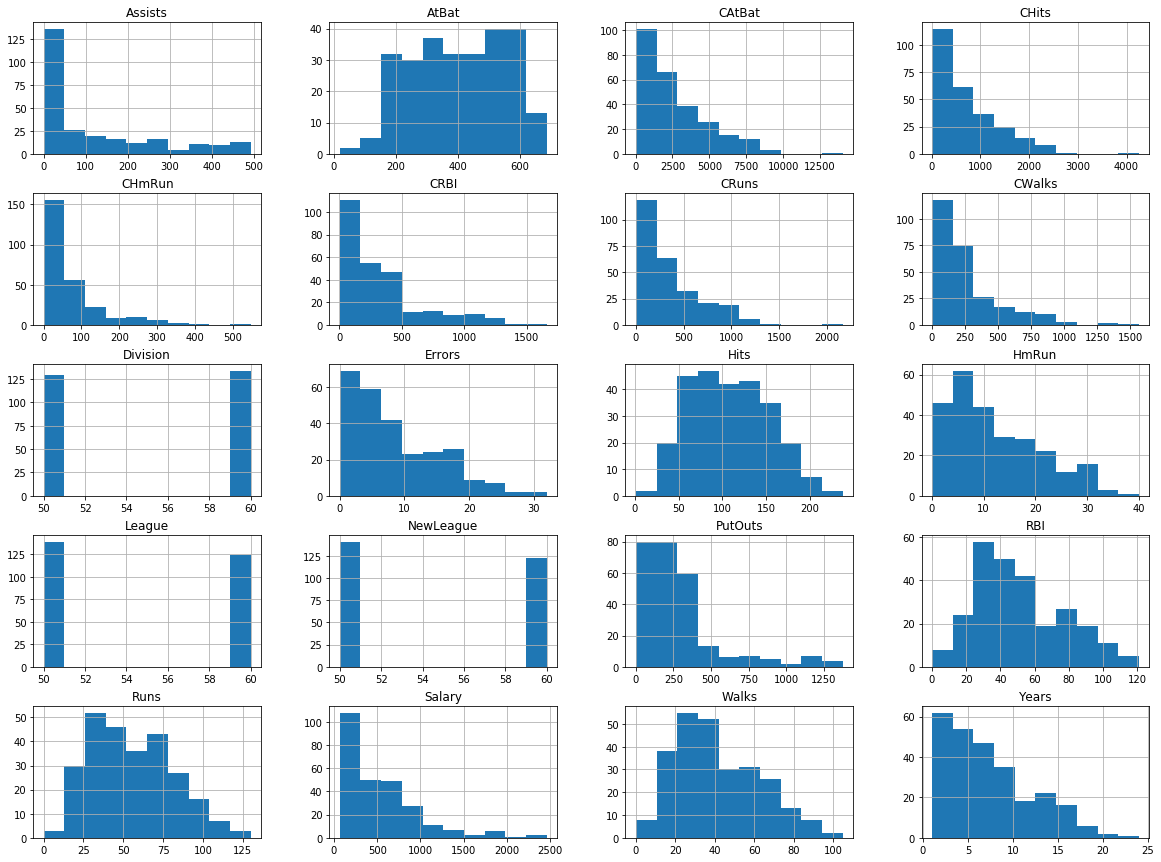

In [12]:
Data_train.hist(figsize = (20,15))
plt.show()

# Checking for least required Features with Heatmap

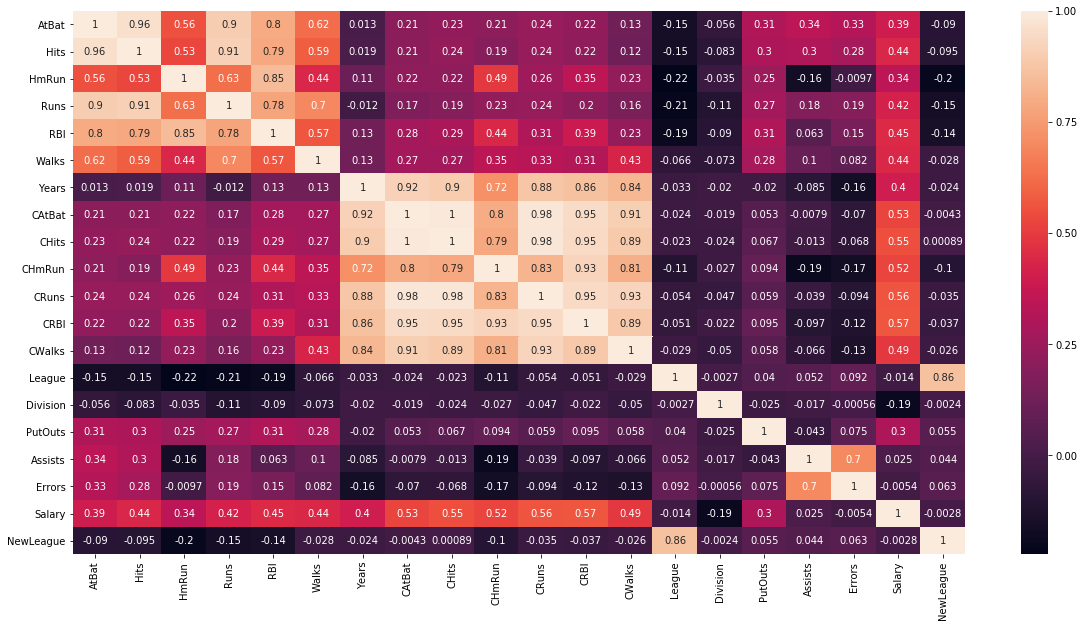

In [13]:
Heat(Data_train)
#dis(Data_train)

Dropping Features that our bad

After removing bad features from our data.


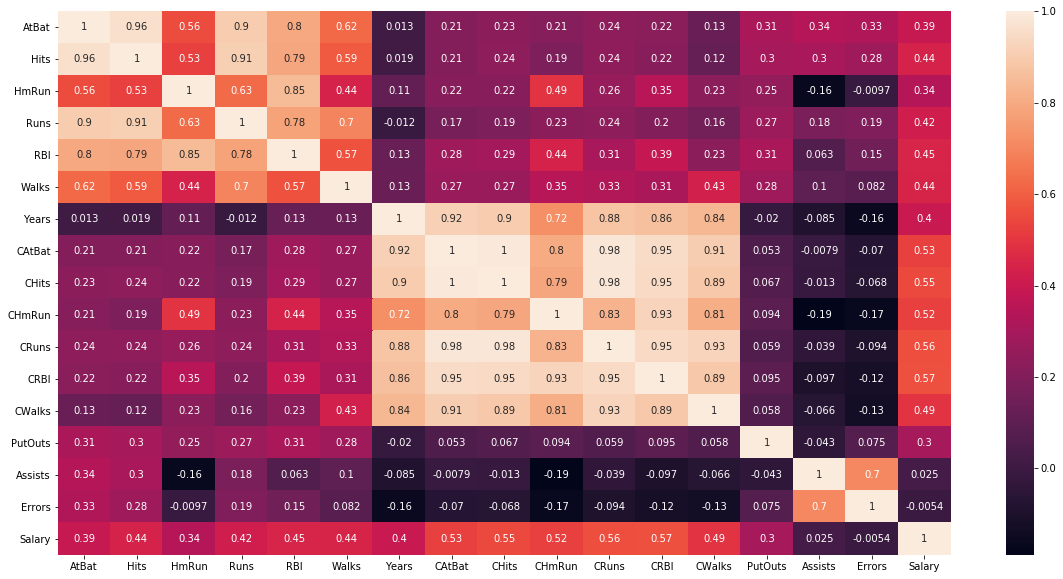

In [14]:
Data_train = Data_train.drop(['Division'],axis = 1)
Data_train = Data_train.drop(['League'],axis = 1)
Data_train = Data_train.drop(['NewLeague'],axis = 1)
Data_train.head()
print('After removing bad features from our data.')
Heat(Data_train)
#dis(Data_train)

In [15]:
Data_target = Data_target.drop(['Division'],axis = 1)
Data_target = Data_target.drop(['League'],axis = 1)
Data_target = Data_target.drop(['NewLeague'],axis = 1)
Target_array = np.array(Data_target)
X_target = Target_array[:,:-1]

# Splitting Training and Test Data within Training Data

In [16]:
Data_array = np.array(Data_train)

DFX = pd.DataFrame(Data_train.loc[:,:'Salary'])
DFX = DFX.drop(['Salary'],axis =1)

X_train = Data_array[:235,:-1]
X_train_test = Data_array[235:,:-1]


Y_train = Data_array[:235,-1]
Y_train_test = Data_array[235:,-1]

# Ridge Regression
1. Training model 'ridge'

In [17]:
ridge = Ridge(alpha = .0008,normalize = True)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.0008, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

2. Visualizing Coefficients

    Columns  Coefficient
0     AtBat    -2.142672
1      Hits     6.811597
2     HmRun     0.451745
3      Runs     0.150867
4       RBI     0.492329
5     Walks     5.001096
6     Years    -2.410828
7    CAtBat    -0.157967
8     CHits     0.025681
9    CHmRun    -0.450001
10    CRuns     1.334692
11     CRBI     1.018829
12   CWalks    -0.676457
13  PutOuts     0.326991
14  Assists     0.371144
15   Errors    -2.421001


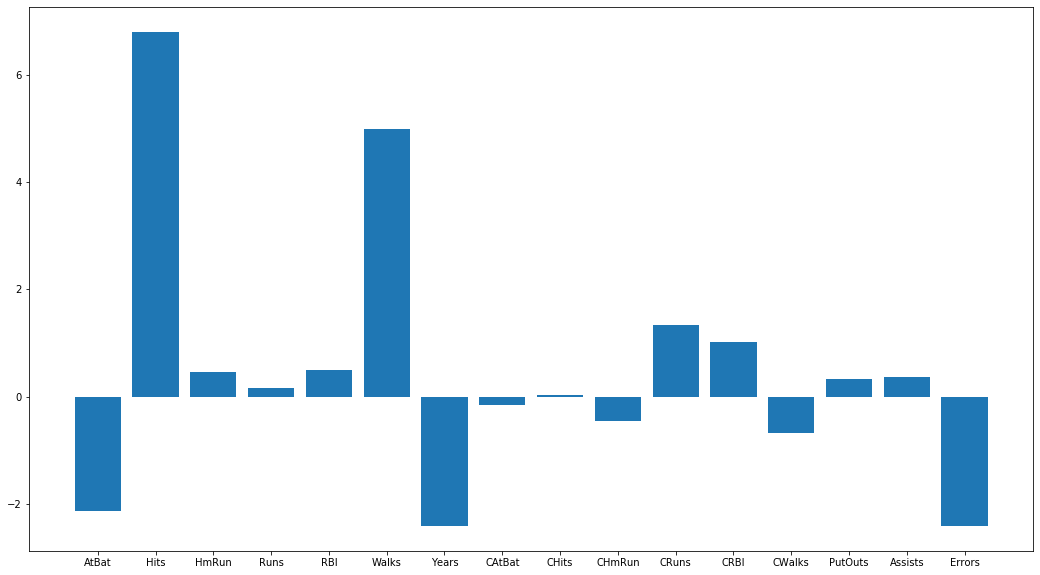

In [18]:
ridge_coef = pd.DataFrame()
ridge_coef["Columns"] = DFX.columns
ridge_coef["Coefficient"] = pd.Series(ridge.coef_)
print(ridge_coef)
Bar(ridge_coef["Columns"], ridge_coef["Coefficient"])

# Calculating Rmse for Training and Testing Data and Plotting original and predicted values For Ridge Regression.

For Training Data 311.99234450323274
For Testing Data 297.5623689562631


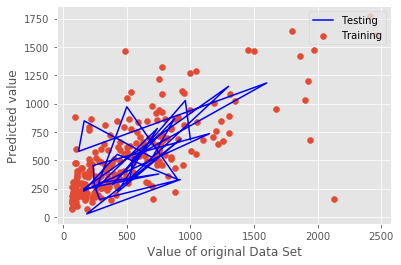

In [19]:
Y_pred_train = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
Y_pred_train_test = ridge.predict(X_train_test)
rmse_train_test = np.sqrt(mean_squared_error(Y_train_test, Y_pred_train_test))
print('For Training Data', rmse_train)
print('For Testing Data', rmse_train_test)
plt.scatter(Y_train, Y_pred_train,label = 'Training')
plt.legend(['Training'],loc = 'upper right')
plt.plot(Y_train_test, Y_pred_train_test, label = 'Testing', color = 'blue')
plt.xlabel('Value of original Data Set')
plt.ylabel('Predicted value')
plt.legend(loc = 'upper right')
plt.show()

# Predicting Values for Target Data Set

In [20]:
Y_Target_R = ridge.predict(X_target)
print('Predicted values with Ridge Regression\n',Y_Target_R)

Predicted values with Ridge Regression
 [ 137.41726007   79.24885396  831.28208311  393.31817108  672.97758097
 1258.15056534  198.62930405  761.92286909  187.35827331  352.71136491
  342.69408879  291.78501091 1303.69967368  106.29679134  419.11112635
  112.06134179  138.28995929  445.53136008  293.75582351  269.72532734
  859.6532685   124.49836226  321.68775774  676.86783454  369.39267306
  531.31579572 1106.88301395   57.50193368  157.93717162  974.07141216
  523.19368262  167.1385725   378.83056175  243.13449124  175.8325892
  592.37909595  155.47163531  218.18439234  244.0508993   305.342201
  118.38249318  659.73830963  172.16881848  342.15223163  349.66127328
  416.72936717  336.8657662  1069.49869477  597.18922427  165.2371818
  118.9847288   396.57736752  233.41172948  138.6196837   675.12401357
  139.32521769 1343.85373836  961.39803729  240.98228541]


# Lasso Regression
1. Training Model

In [21]:
lasso = Lasso(alpha = 0.01, normalize = True)
lasso.fit(X_train, Y_train)

C:\Users\nabhr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434665.08528796956, tolerance: 4900.630711327813
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

2. Visualizing Coefficients

    Columns  Coefficient
0     AtBat    -2.136390
1      Hits     6.892861
2     HmRun     0.756205
3      Runs    -0.000000
4       RBI     0.351007
5     Walks     5.013487
6     Years    -1.312714
7    CAtBat    -0.169843
8     CHits    -0.000000
9    CHmRun    -0.608980
10    CRuns     1.423631
11     CRBI     1.094356
12   CWalks    -0.687808
13  PutOuts     0.326581
14  Assists     0.371738
15   Errors    -2.294680


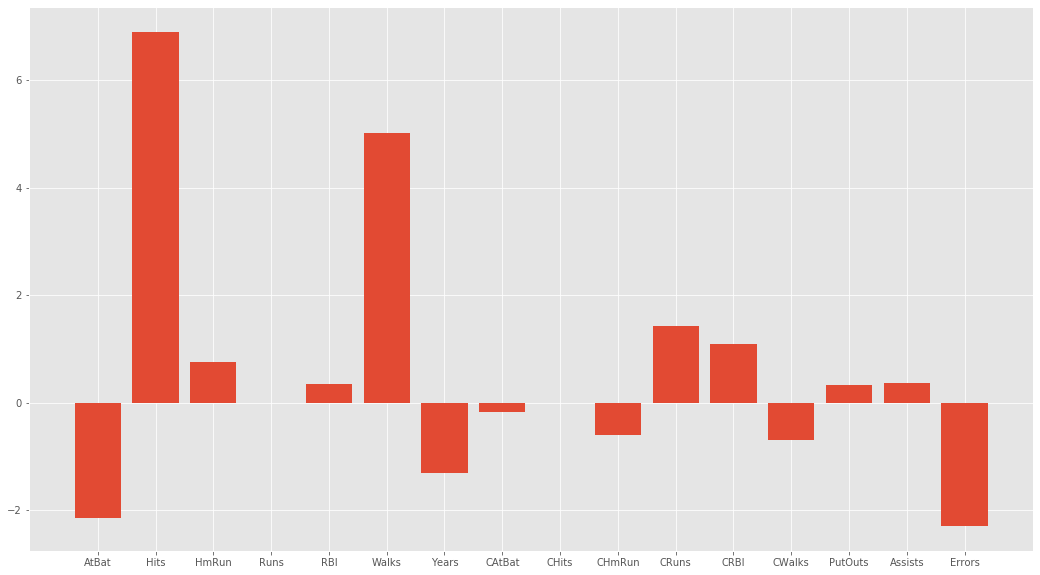

In [22]:
lasso_coef = pd.DataFrame()
lasso_coef["Columns"] = DFX.columns
lasso_coef["Coefficient"] = pd.Series(lasso.coef_)
print(lasso_coef)
Bar(lasso_coef["Columns"], lasso_coef["Coefficient"])

# Calculating Rmse for Training and Testing Data and Plotting original and predicted values For Ridge Regression.

For Training Data 311.92758702361226
For Testing Data 297.8098719558876


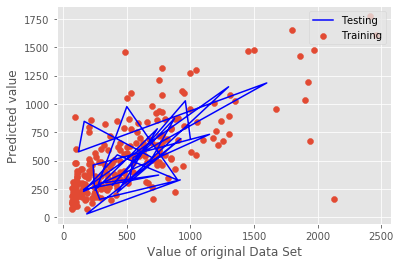

In [23]:
Y_pred_train = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
Y_pred_train_test = lasso.predict(X_train_test)
rmse_train_test = np.sqrt(mean_squared_error(Y_train_test, Y_pred_train_test))
print('For Training Data', rmse_train)
print('For Testing Data', rmse_train_test)
plt.scatter(Y_train, Y_pred_train,label = 'Training')
plt.legend(['Training'],loc = 'upper right')
plt.plot(Y_train_test, Y_pred_train_test, label = 'Testing', color = 'blue')
plt.xlabel('Value of original Data Set')
plt.ylabel('Predicted value')
plt.legend(loc = 'upper right')
plt.show()

# Predicting Values for Target Data set using Lasso

In [24]:
Y_Target_L = lasso.predict(X_target)
print('Predicted Values with Lasso Regression\n',Y_Target_L)

Predicted Values with Lasso Regression
 [ 137.48651377   79.83018758  825.89860059  399.04197483  672.51948672
 1259.216157    202.55689726  759.91072103  187.24527981  340.51148014
  346.69760972  288.44468137 1310.52350329  108.68410859  418.61689699
  113.75344441  137.63928474  444.81789638  294.82235331  270.16923181
  851.19491314  123.53384939  323.34734763  678.67670696  369.20363602
  531.8974074  1115.38423638   59.95248731  157.34874694  979.12623919
  522.72115371  163.53223762  377.94591177  249.01037284  175.77863305
  592.87498155  160.32328775  219.16873039  244.09099604  303.8461139
  117.73107216  670.13089692  172.86506622  339.72185822  346.75516828
  415.71839539  338.09077985 1065.45512225  595.32878217  164.71266516
  118.00283589  398.4278276   233.5796233   139.67747014  677.71112028
  139.31105202 1349.01551764  967.68376774  244.17159622]


# Comparing Predicted Values of Target Datasets by Ridge and Lasso Regression.

In [25]:
A = []
for i in range(len(Y_Target_L)):
    A.append(abs(Y_Target_L[i] - Y_Target_R[i]))
max(A)

12.199884765364345

# Comparing Ridge and Lasso Coefficients

Difference between coefficients from ridge and lasso regression


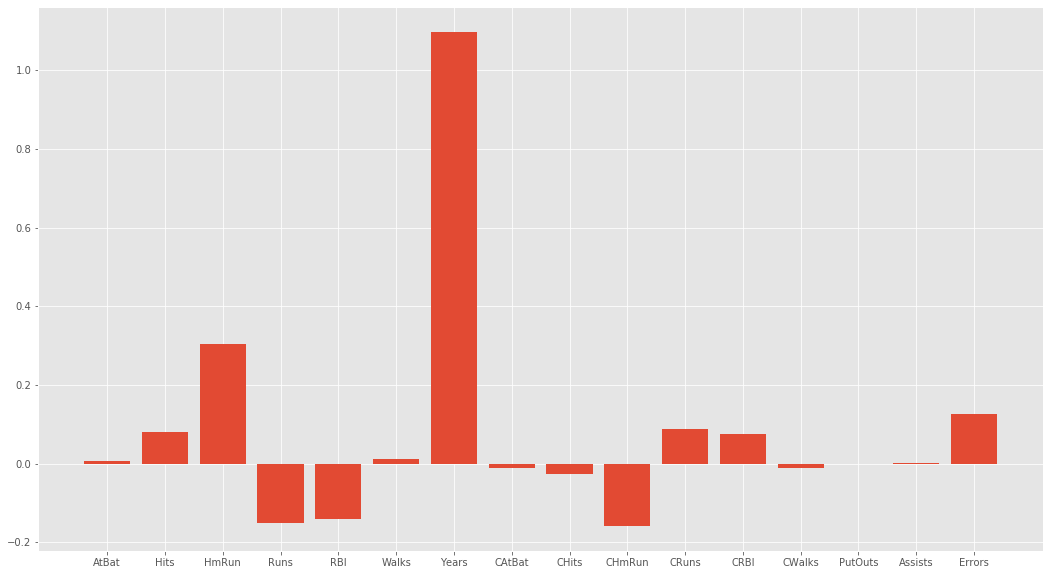

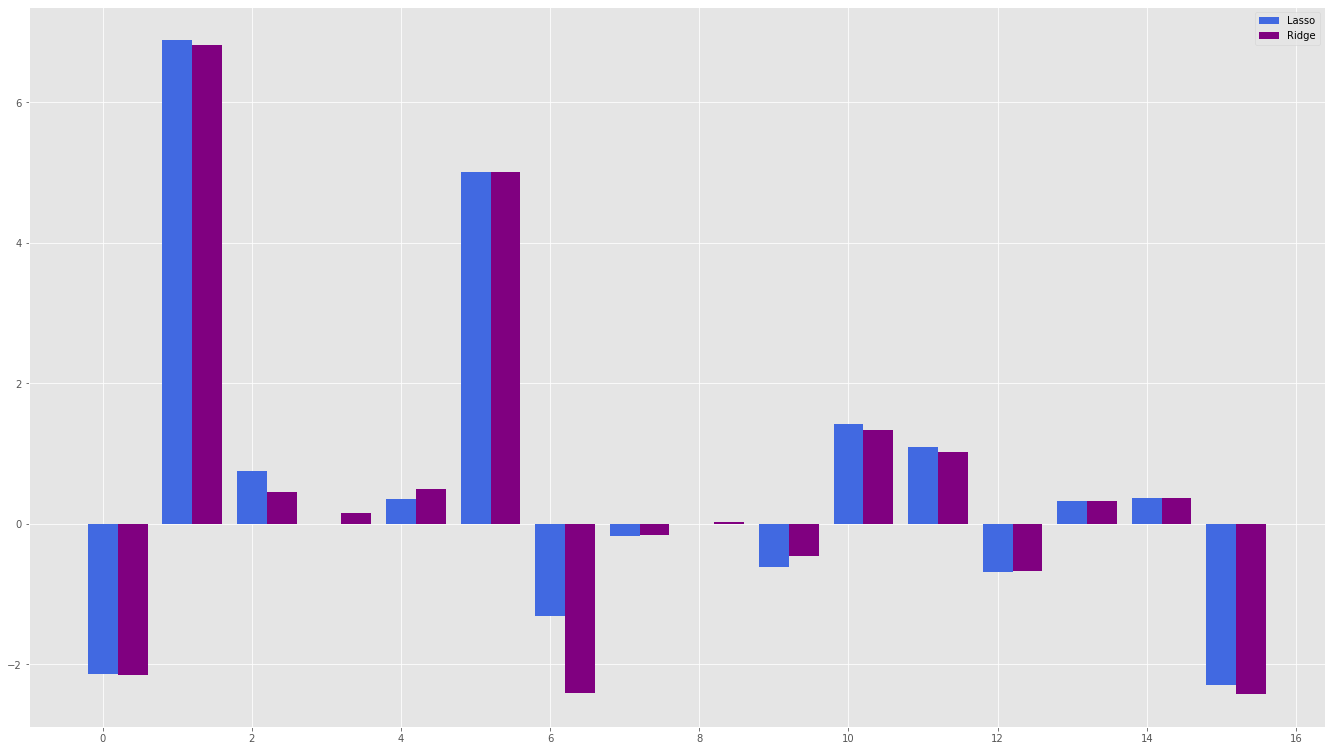

In [26]:
print('Difference between coefficients from ridge and lasso regression')
Bar(ridge_coef['Columns'], lasso_coef['Coefficient'] - ridge_coef['Coefficient'])
X = np.arange(16)
fig = plt.figure(figsize=(18,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, lasso_coef['Coefficient'], color = 'royalblue' , width = .4)
ax.bar(X + 0.4, ridge_coef['Coefficient'], color = 'purple' , width = .4)
plt.legend(labels = ['Lasso','Ridge'])
plt.show()